In [1]:
import numpy as np
import scipy.sparse.linalg as la
import matplotlib.pyplot as plt
from scipy.io import loadmat

# Computed Tomography

The following example is a tomographic X-ray data of a walnut. The dataset was prepared by the [Finnish Inverse Problems Society](http://www.fips.fi/dataset.php).

In [2]:
data = loadmat('./data/Data82.mat')

## Measurement Matrix $A$

In [3]:
A = data['A'] #this is 82*82

In [4]:
A.data.nbytes

7762752

In [9]:
A.shape #9840 is the number of projections 


(9840, 6724)

In [7]:
82*82

6724

In [8]:
82*120  # there're 120 orientations in total

9840

In [10]:
type(A) #we're importing a sparse matrix

scipy.sparse.csc.csc_matrix

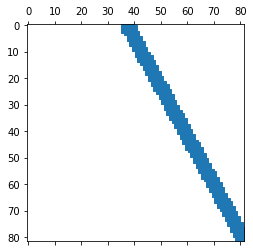

ROW: 3419


In [12]:
index = np.random.randint(0,A.shape[0]) #pick a random row
proj = A[index,:].reshape(82,82)
plt.spy(proj)
plt.show()
print('ROW:', index)
#it's adding all the pixels through this array on the object

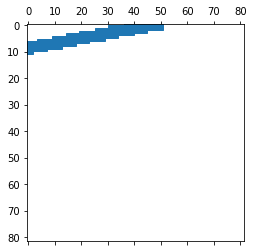

ROW: 1


In [14]:
index = 1 #np.random.randint(0,A.shape[0]) #pick a random row
#now it's the first projection
proj = A[index,:].reshape(82,82)
plt.spy(proj)
plt.show()
print('ROW:', index)
#it's adding all the pixels through this array on the object

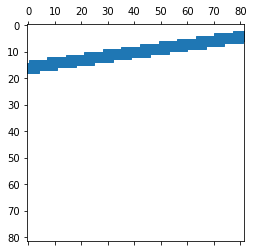

ROW: 10


In [15]:
index = 10 #np.random.randint(0,A.shape[0]) #pick a random row
#now it's the first projection
proj = A[index,:].reshape(82,82)
plt.spy(proj)
plt.show()
print('ROW:', index)
#it's adding all the pixels through this array on the object

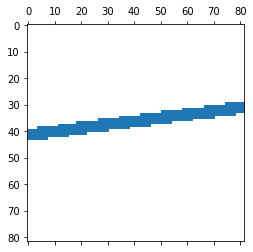

ROW: 200


In [16]:
index = 200
#it's moving across the image
proj = A[index,:].reshape(82,82)
plt.spy(proj)
plt.show()
print('ROW:', index)
#it's adding all the pixels through this array on the object

## Sinogram: Measured Projections

In [20]:
sinogram = data['m']

In [21]:
sinogram.nbytes

78720

In [22]:
sinogram.shape
#120 columns, 120 orientations
#the veritical axis measures how much x ray passes through

(82, 120)

In [23]:
type(sinogram)

numpy.ndarray

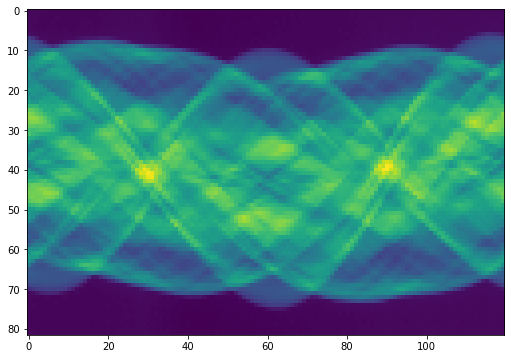

In [24]:
plt.figure(figsize=(10,6))
plt.imshow(sinogram)
plt.show()

## Compute Least Squares Solution

In [25]:
b = sinogram.reshape([82*120,1],order='F') #reshape to a long long vector

In [78]:
result = la.lsmr(A,b,atol=1e-10,btol=1e-10)

In [79]:
x = result[0]

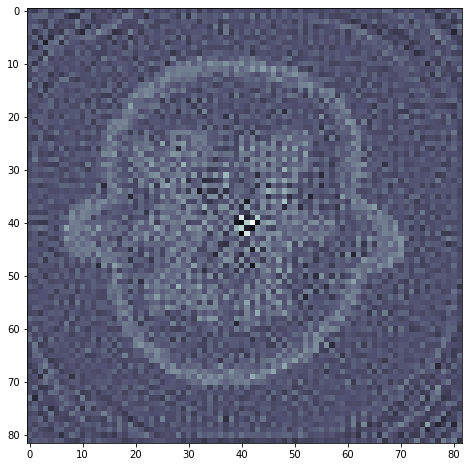

In [80]:
plt.figure(figsize=(8,8))
plt.imshow(x.reshape(82,82).T,cmap='bone')
plt.show()

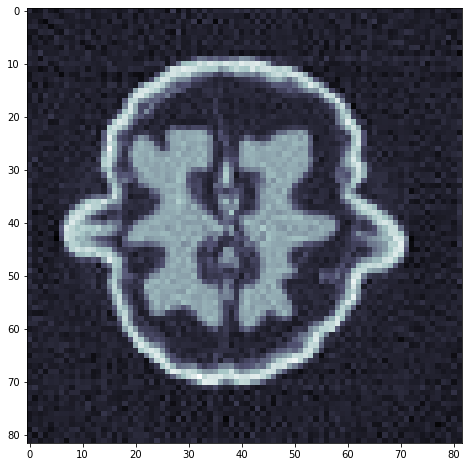

In [65]:
result1 = la.lsmr(A,b,atol=1e-2,btol=1e-10)
x1= result1[0]
plt.figure(figsize=(8,8))
plt.imshow(x1.reshape(82,82).T,cmap='bone')
plt.show()

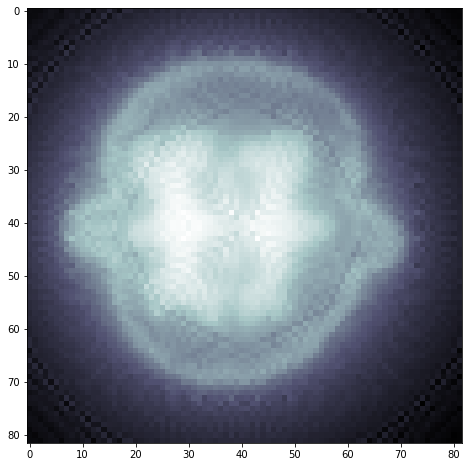

1


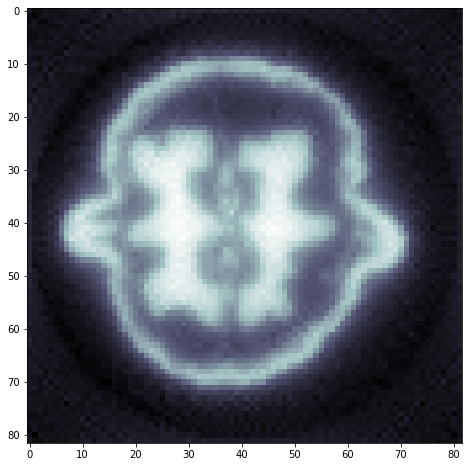

0.1


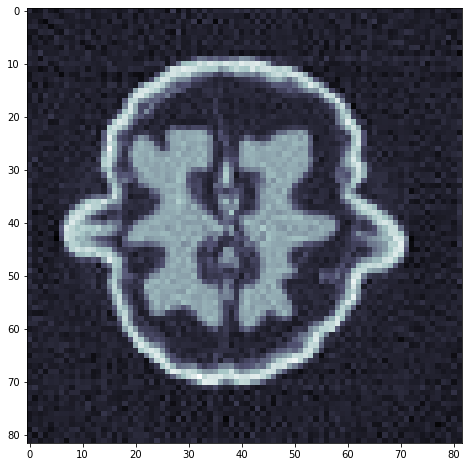

0.01


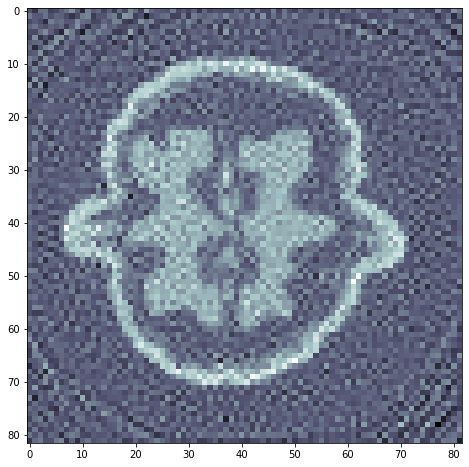

0.001


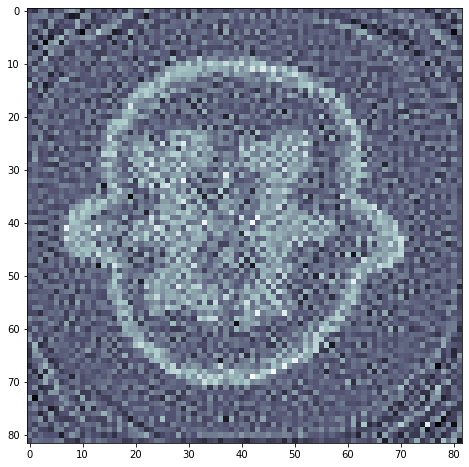

0.0001


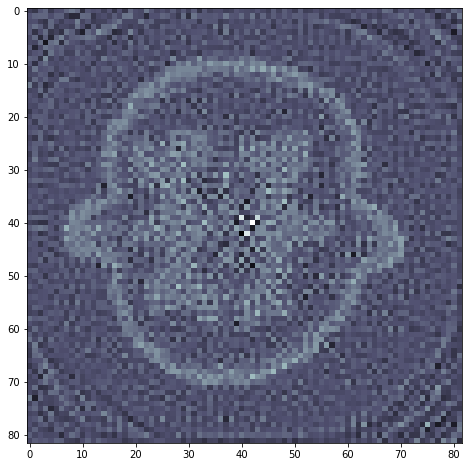

1e-05


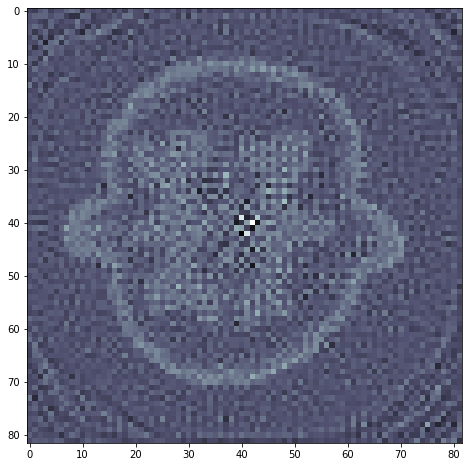

1e-06


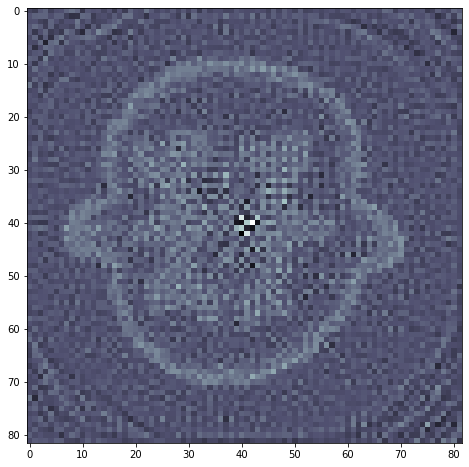

1e-07


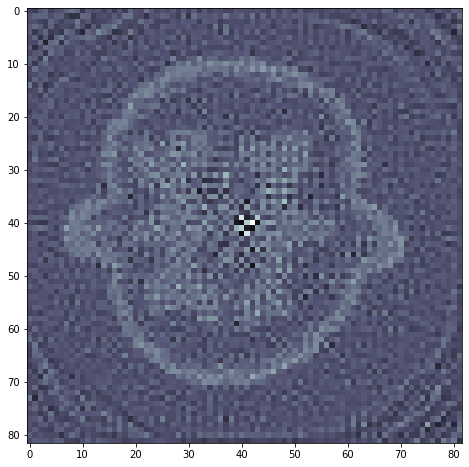

1e-08


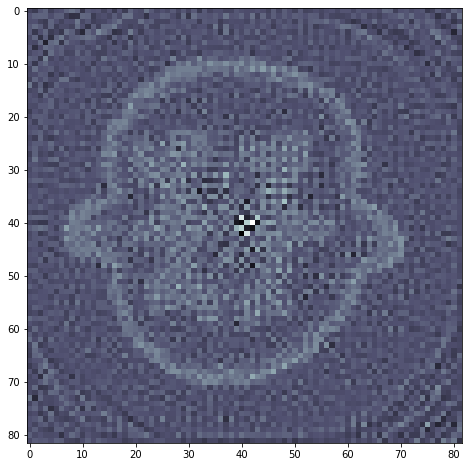

1e-09


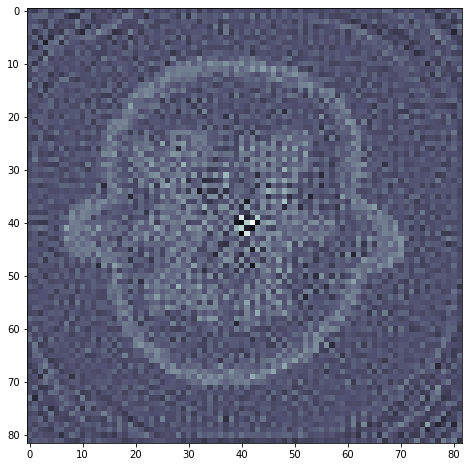

1e-10


In [85]:
abtol = [1, 1e-1, 1e-2, 1e-3,1e-4, 1e-5, 1e-6, 1e-7,1e-8, 1e-9, 1e-10]

for i in abtol:    
    result_list = la.lsmr(A,b,atol=i,btol=1e-10)
    x_list= result_list[0]
    plt.figure(figsize=(8,8))
    plt.imshow(x_list.reshape(82,82).T,cmap='bone')
    plt.show()
    print(i)


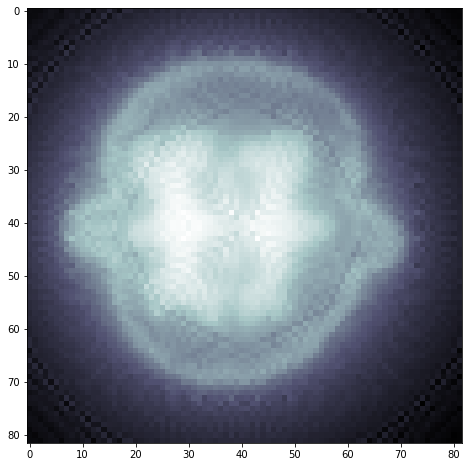

1


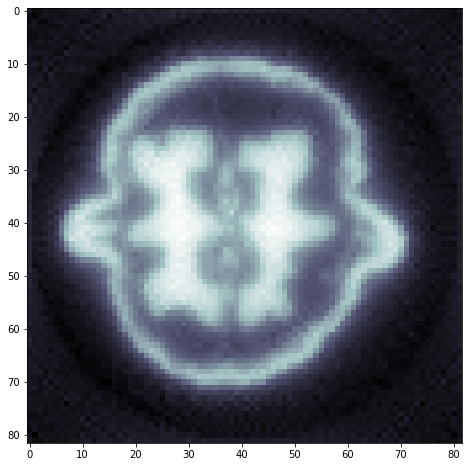

0.1


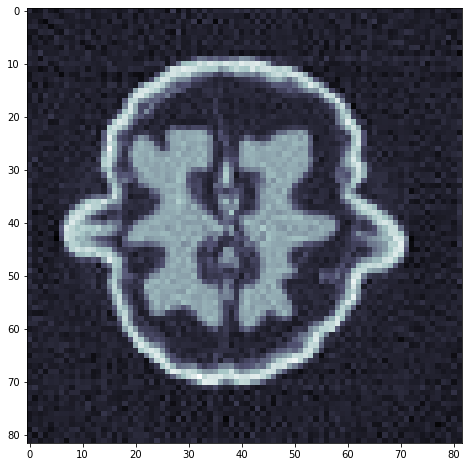

0.01


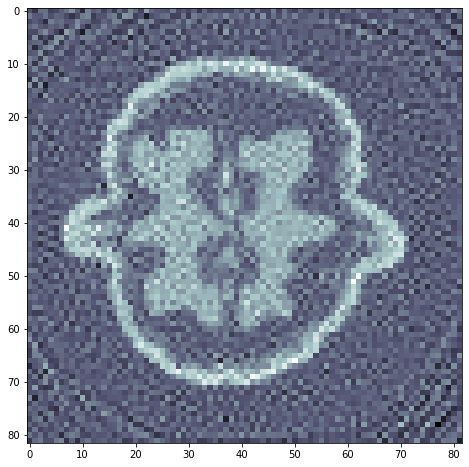

0.001


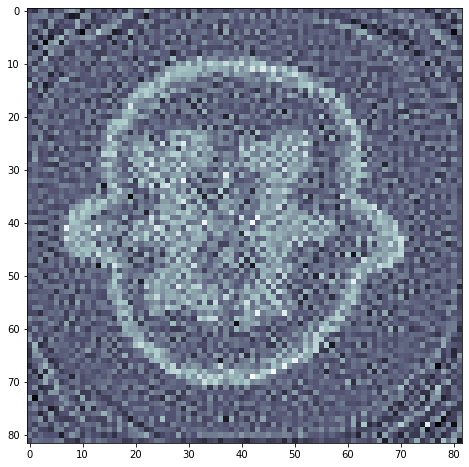

0.0001


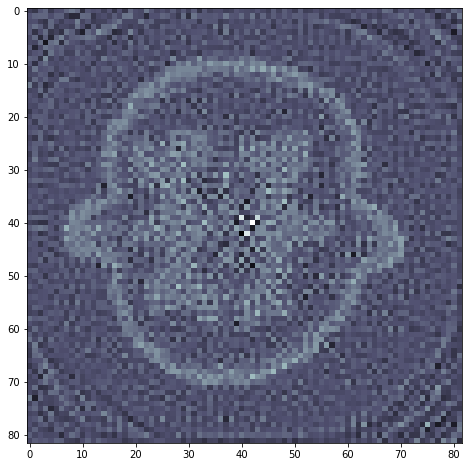

1e-05


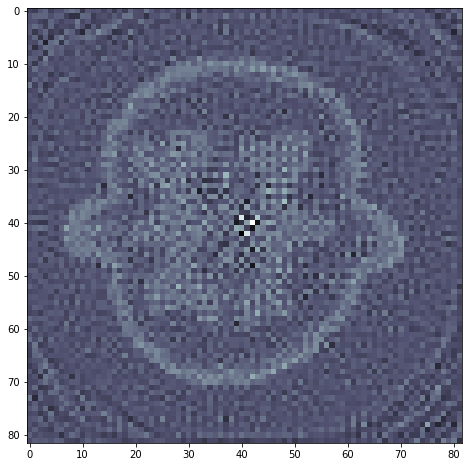

1e-06


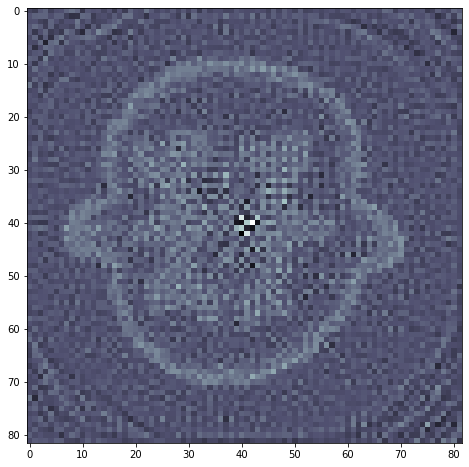

1e-07


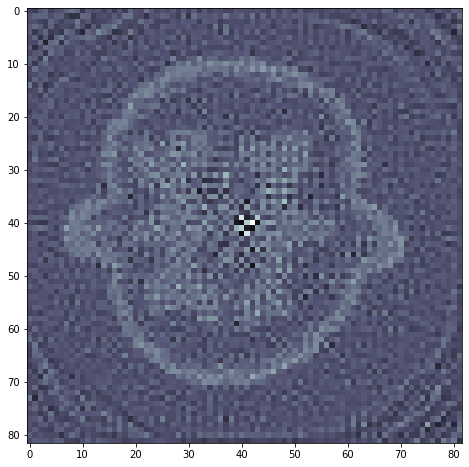

1e-08


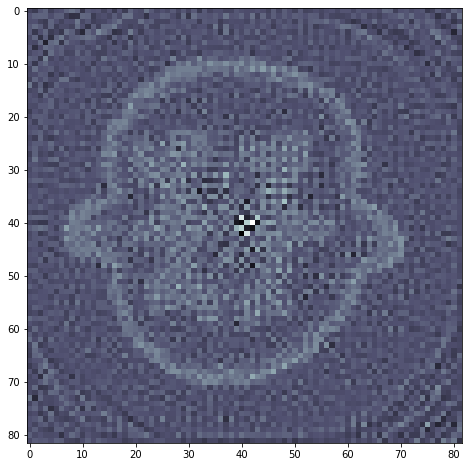

1e-09


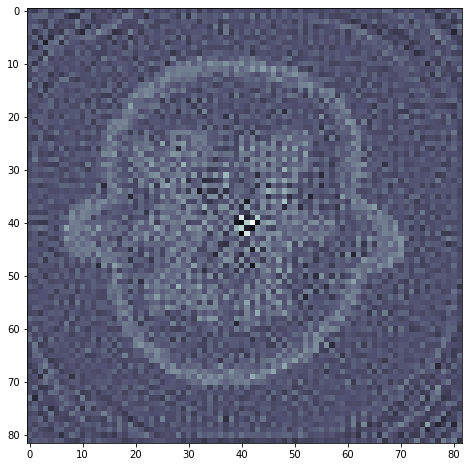

1e-10


In [86]:
abtol = [1, 1e-1, 1e-2, 1e-3,1e-4, 1e-5, 1e-6, 1e-7,1e-8, 1e-9, 1e-10]

for i in abtol:    
    result_list = la.lsmr(A,b,atol=i,btol=1e-9)
    x_list= result_list[0]
    plt.figure(figsize=(8,8))
    plt.imshow(x_list.reshape(82,82).T,cmap='bone')
    plt.show()
    print(i)

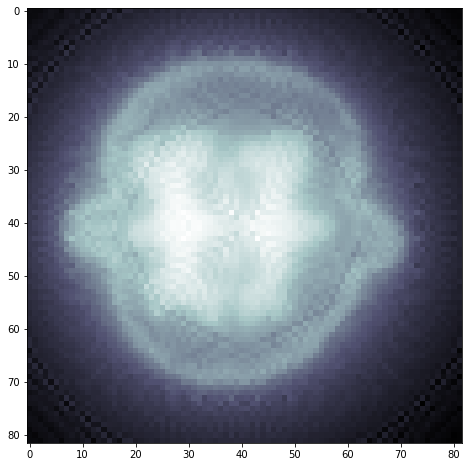

1


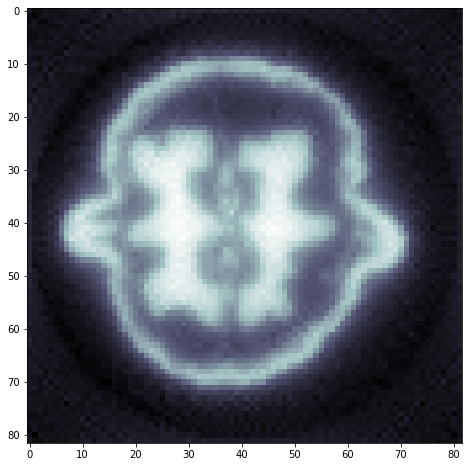

0.1


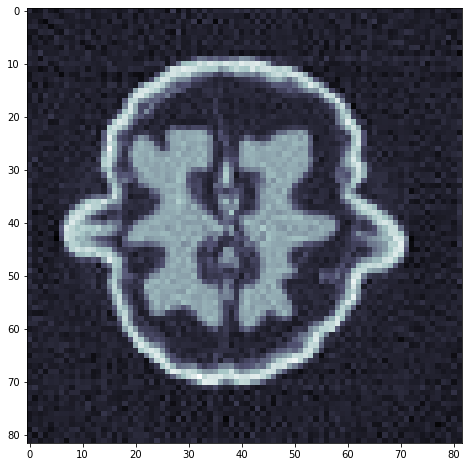

0.01


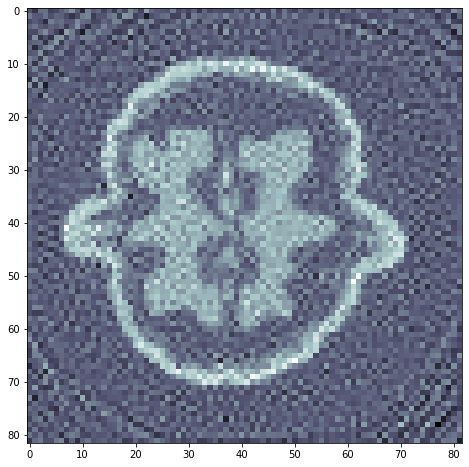

0.001


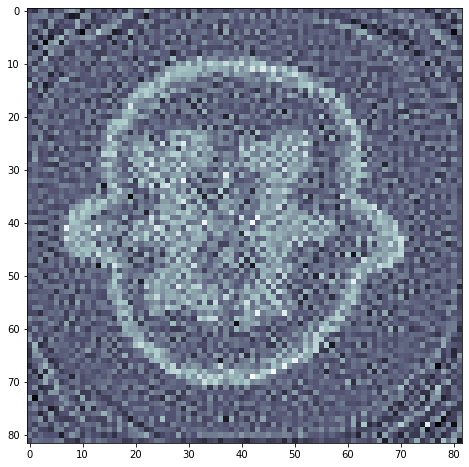

0.0001


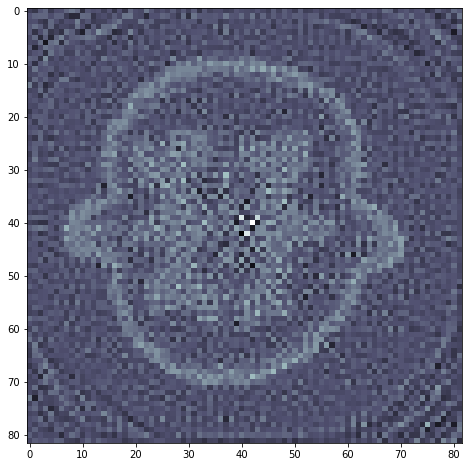

1e-05


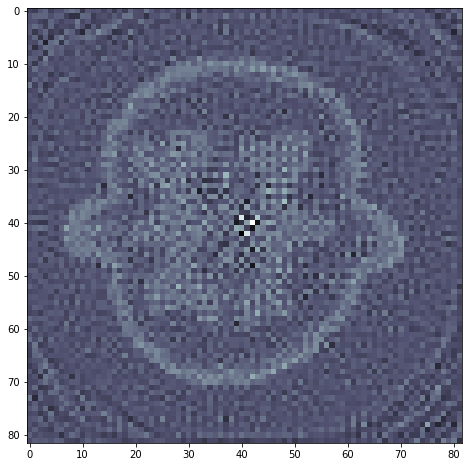

1e-06


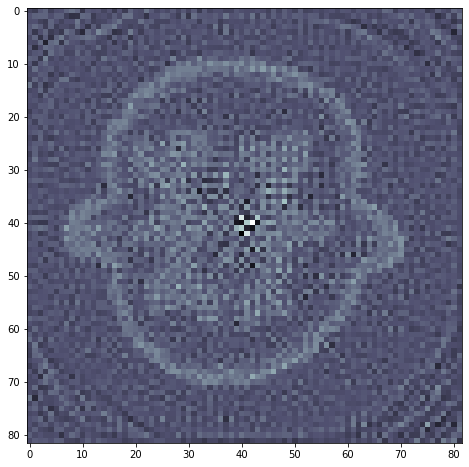

1e-07


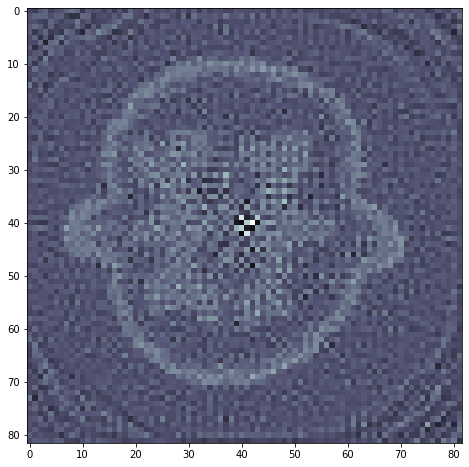

1e-08


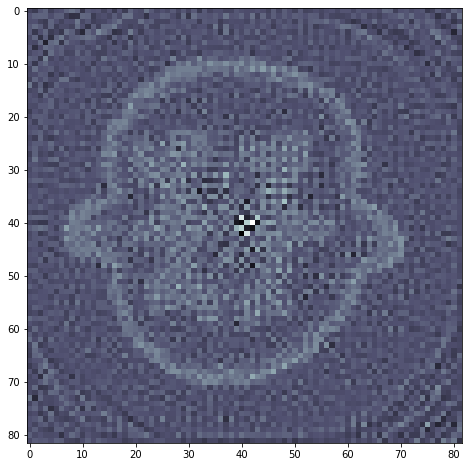

1e-09


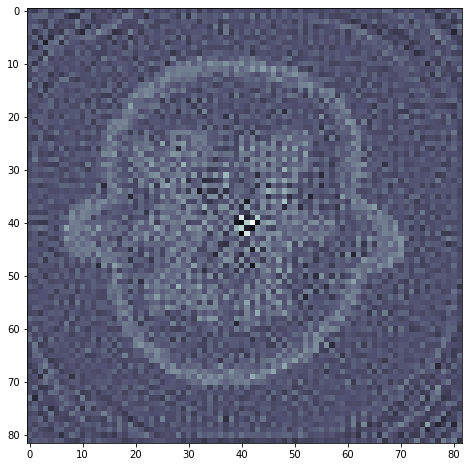

1e-10


In [87]:
abtol = [1, 1e-1, 1e-2, 1e-3,1e-4, 1e-5, 1e-6, 1e-7,1e-8, 1e-9, 1e-10]

for i in abtol:    
    result_list = la.lsmr(A,b,atol=i,btol=1e-8)
    x_list= result_list[0]
    plt.figure(figsize=(8,8))
    plt.imshow(x_list.reshape(82,82).T,cmap='bone')
    plt.show()
    print(i)

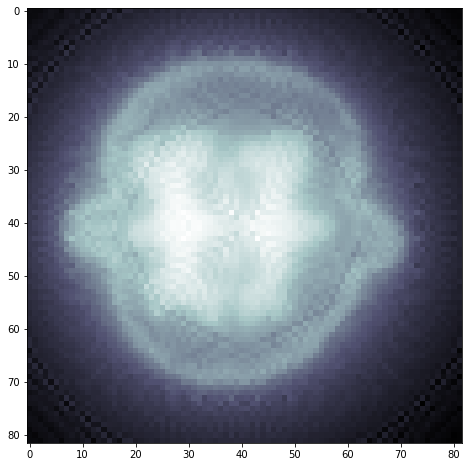

1


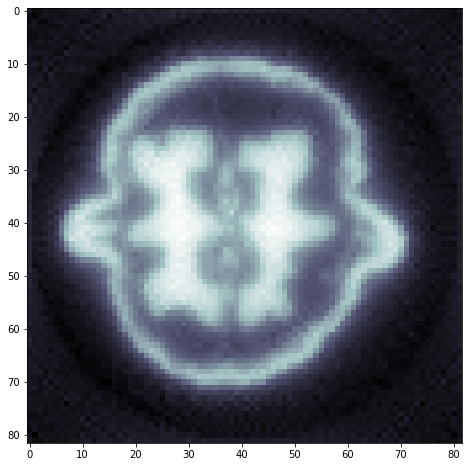

0.1


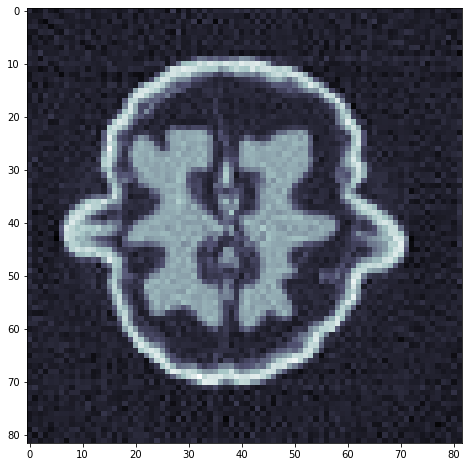

0.01


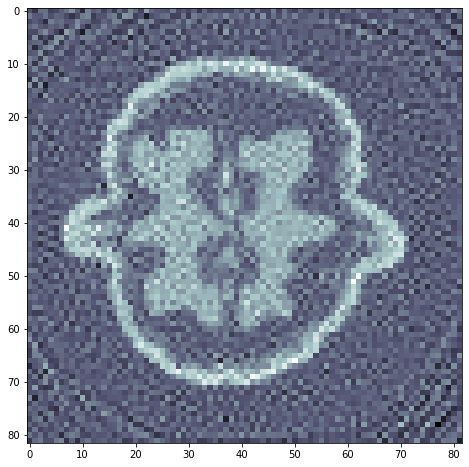

0.001


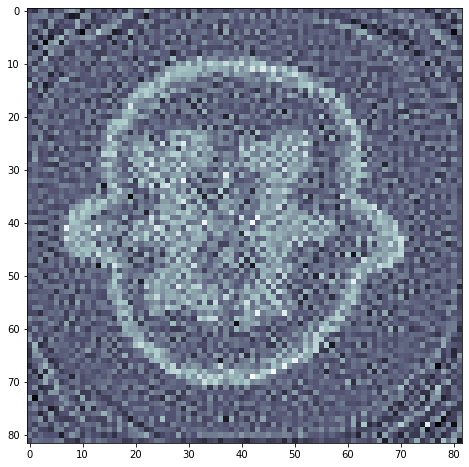

0.0001


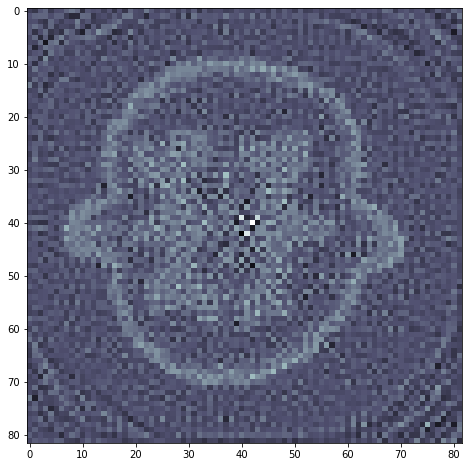

1e-05


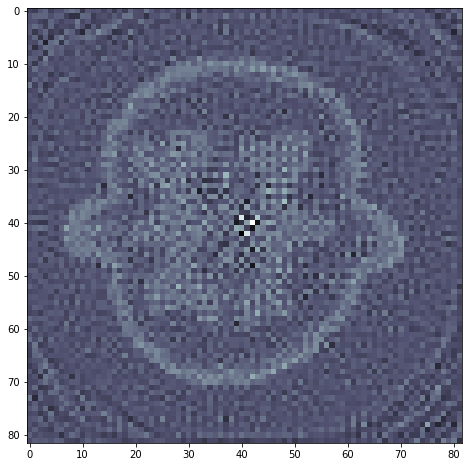

1e-06


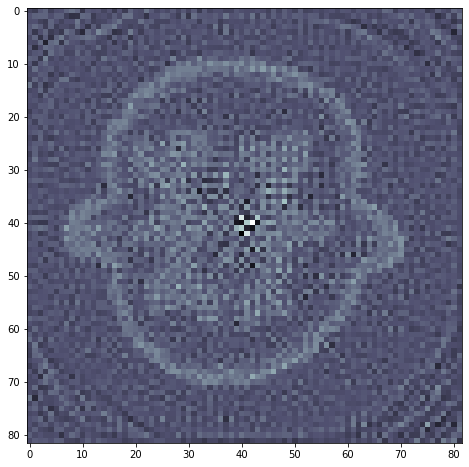

1e-07


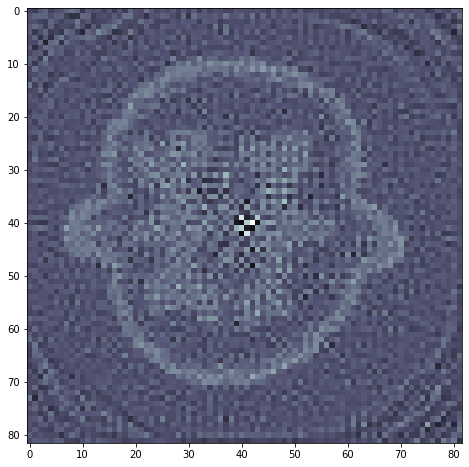

1e-08


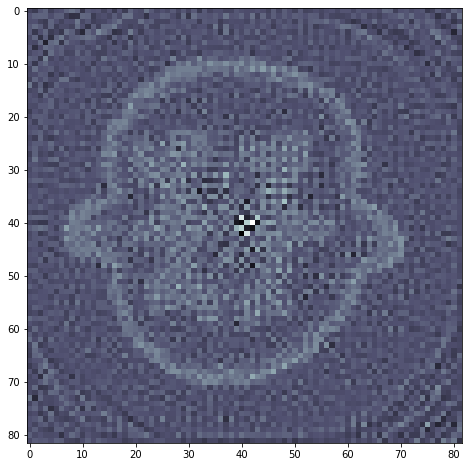

1e-09


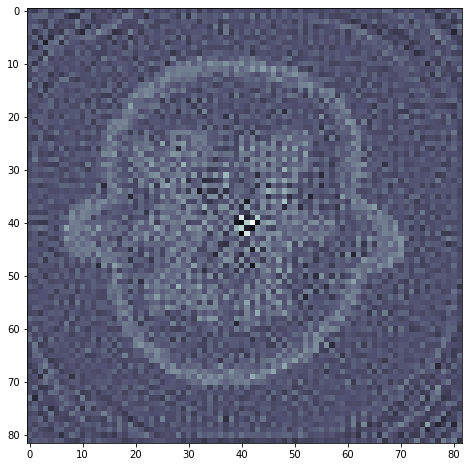

1e-10


In [88]:
abtol = [1, 1e-1, 1e-2, 1e-3,1e-4, 1e-5, 1e-6, 1e-7,1e-8, 1e-9, 1e-10]

for i in abtol:    
    result_list = la.lsmr(A,b,atol=i,btol=1e-4)
    x_list= result_list[0]
    plt.figure(figsize=(8,8))
    plt.imshow(x_list.reshape(82,82).T,cmap='bone')
    plt.show()
    print(i)

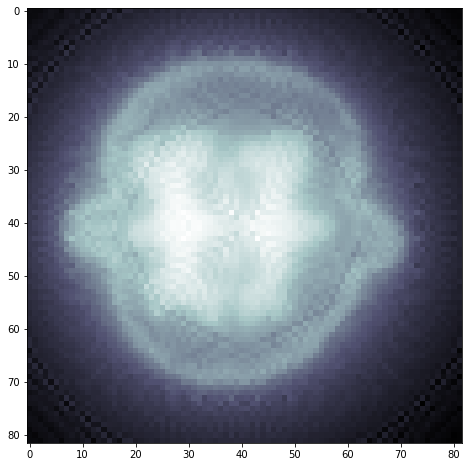

1


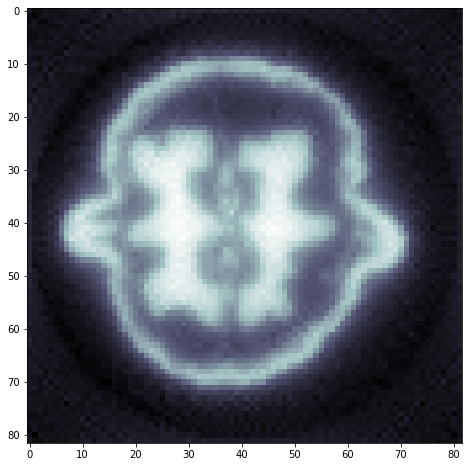

0.1


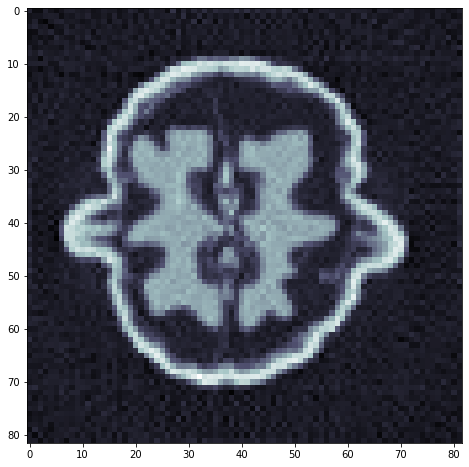

0.01


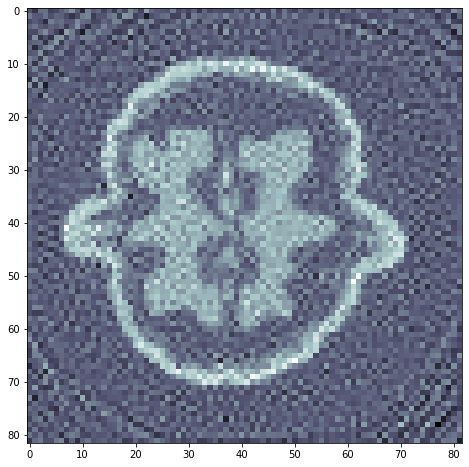

0.001


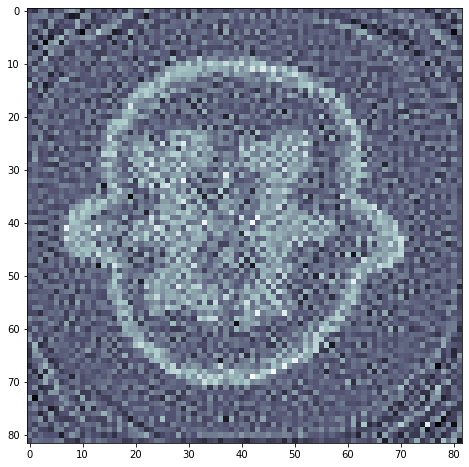

0.0001


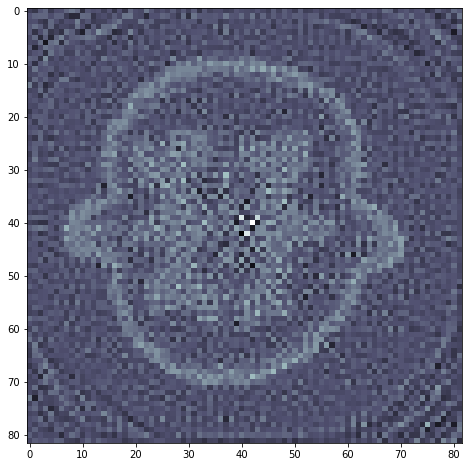

1e-05


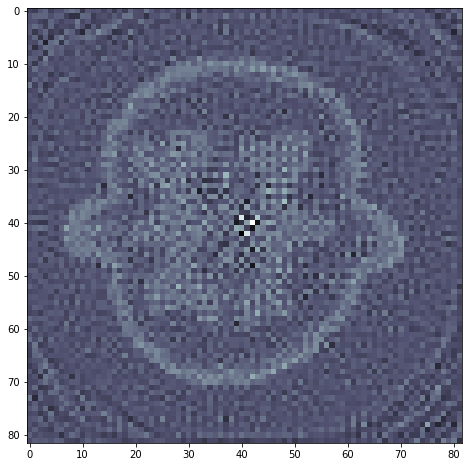

1e-06


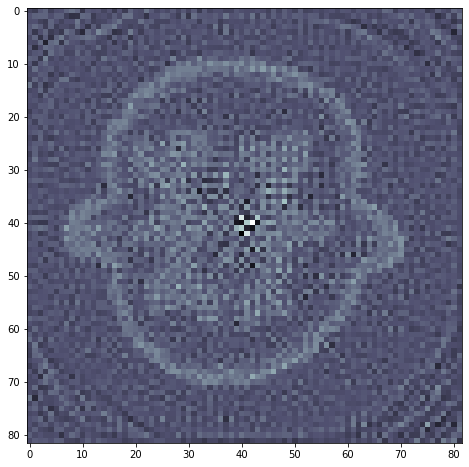

1e-07


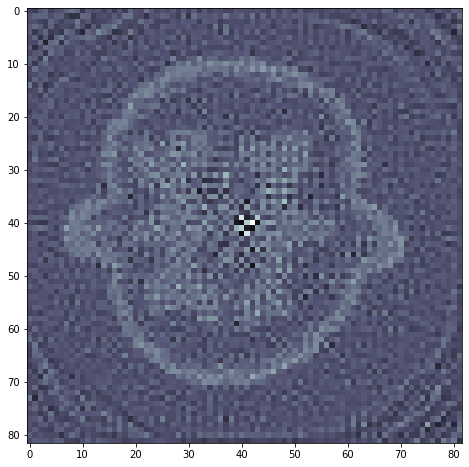

1e-08


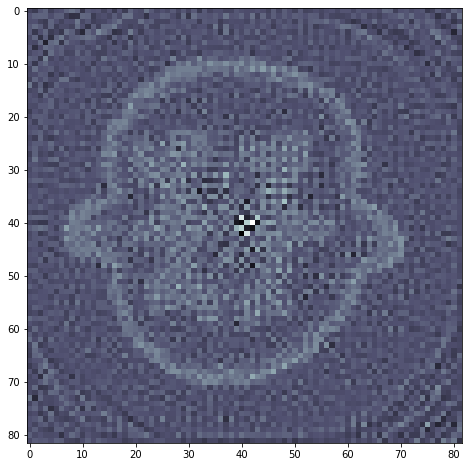

1e-09


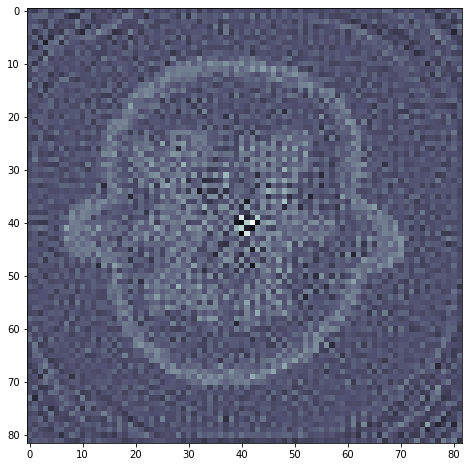

1e-10


In [89]:
abtol = [1, 1e-1, 1e-2, 1e-3,1e-4, 1e-5, 1e-6, 1e-7,1e-8, 1e-9, 1e-10]

for i in abtol:    
    result_list = la.lsmr(A,b,atol=i,btol=1e-2)
    x_list= result_list[0]
    plt.figure(figsize=(8,8))
    plt.imshow(x_list.reshape(82,82).T,cmap='bone')
    plt.show()
    print(i)

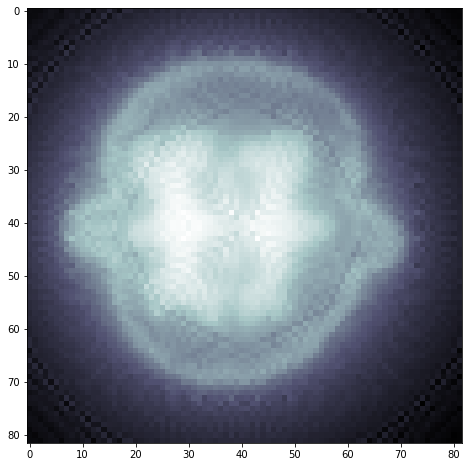

1


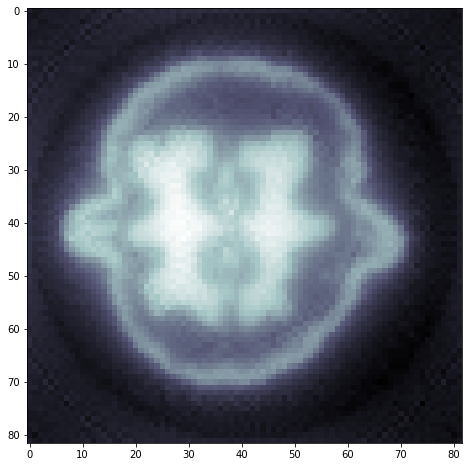

0.1


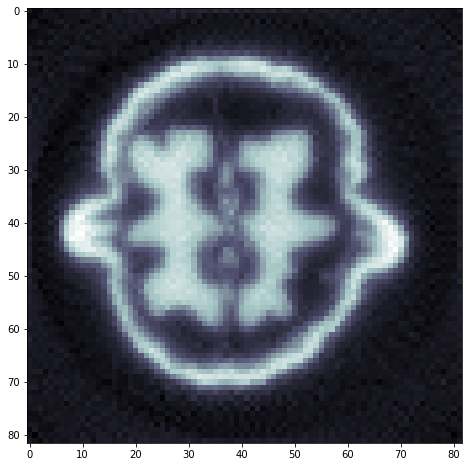

0.01


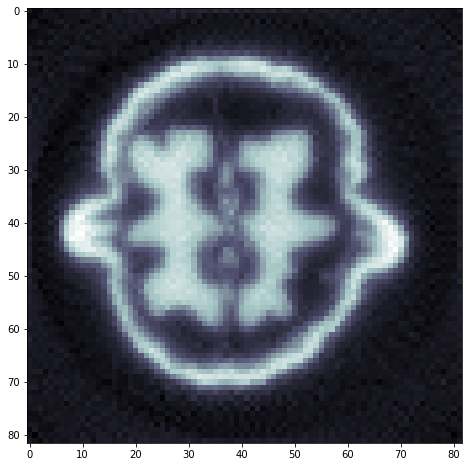

0.001


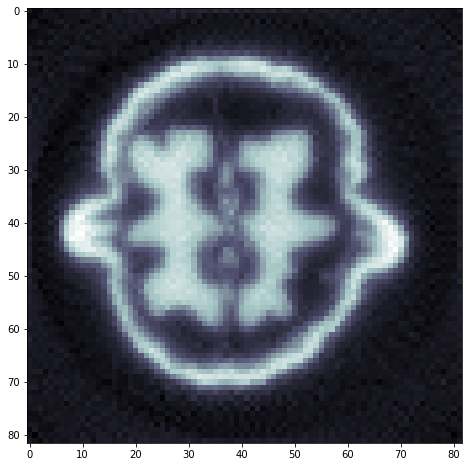

0.0001


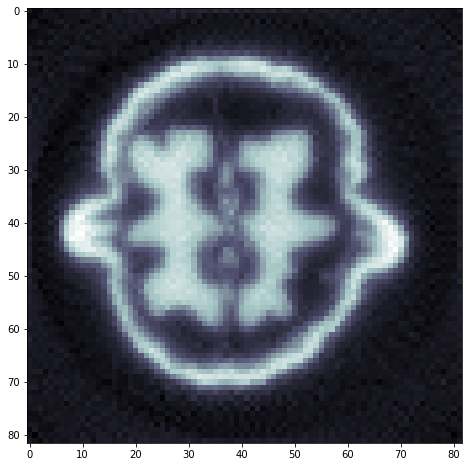

1e-05


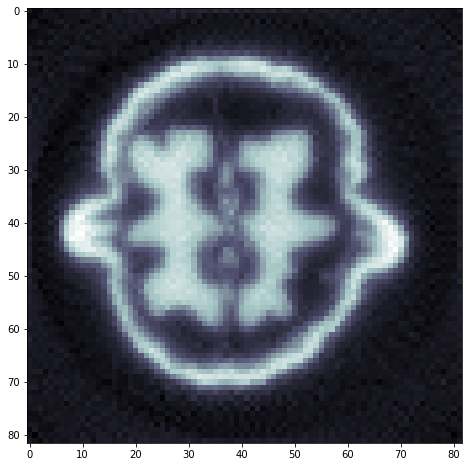

1e-06


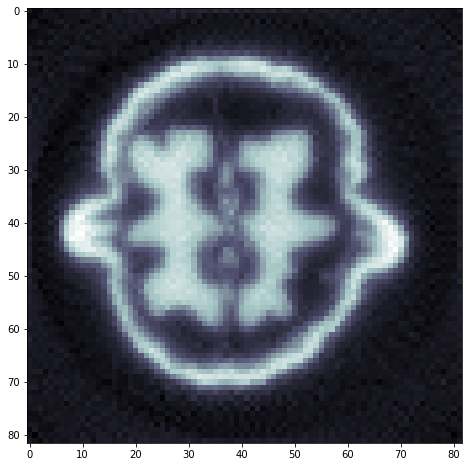

1e-07


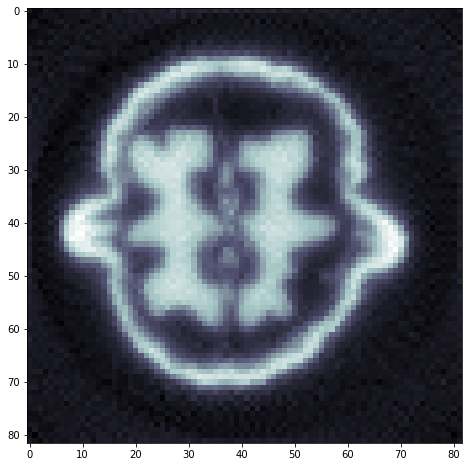

1e-08


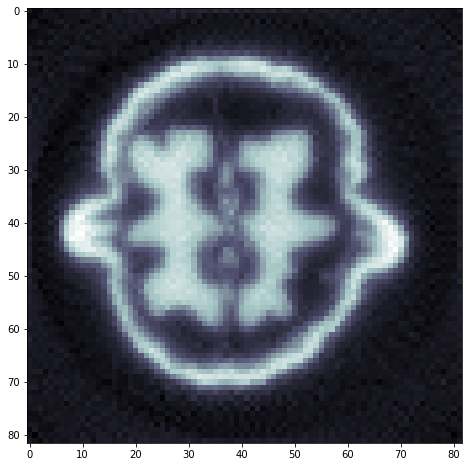

1e-09


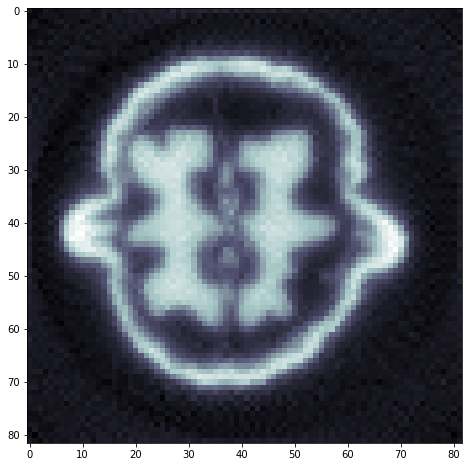

1e-10


In [90]:
abtol = [1, 1e-1, 1e-2, 1e-3,1e-4, 1e-5, 1e-6, 1e-7,1e-8, 1e-9, 1e-10]

for i in abtol:    
    result_list = la.lsmr(A,b,atol=i,btol=1e-1)
    x_list= result_list[0]
    plt.figure(figsize=(8,8))
    plt.imshow(x_list.reshape(82,82).T,cmap='bone')
    plt.show()
    print(i)

## True Solution

![Solution of Computed Tomorgraphy Example](./data/ct_solution.png)